In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
data = pd.read_csv('fraud_detection_data.csv')

In [3]:
# Data Understanding and Preprocessing
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Transaction ID        0
Customer ID           0
Transaction Date      0
Transaction Amount    0
Merchant              0
Location              0
Transaction Type      0
Card Type             0
Is Fraudulent         0
dtype: int64


In [4]:
# Drop rows with missing values for simplicity (or you could impute them)
data.dropna(inplace=True)

In [5]:
# Convert categorical variables into numerical representations
label_encoders = {}
categorical_columns = ['Merchant', 'Location', 'Transaction Type', 'Card Type']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [6]:
# Separate features and target
X = data.drop(['Transaction ID', 'Customer ID', 'Transaction Date', 'Is Fraudulent'], axis=1)
y = data['Is Fraudulent'].map({'Yes': 1, 'No': 0})

In [7]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [9]:
# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

Evaluating Logistic Regression...


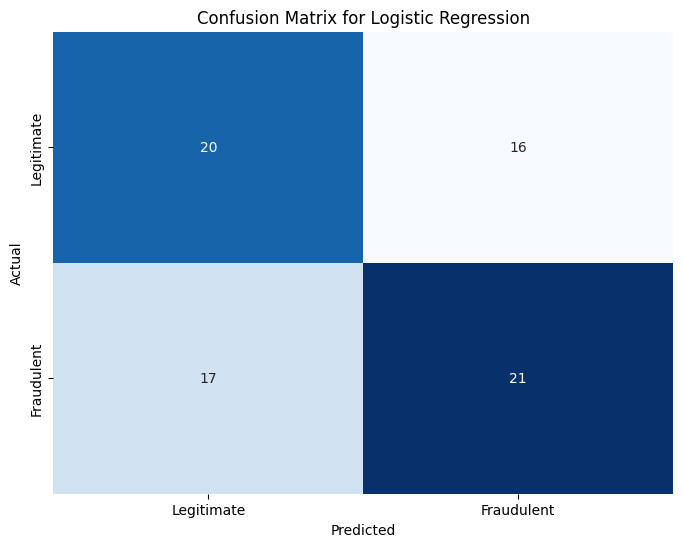

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55        36
           1       0.57      0.55      0.56        38

    accuracy                           0.55        74
   macro avg       0.55      0.55      0.55        74
weighted avg       0.55      0.55      0.55        74



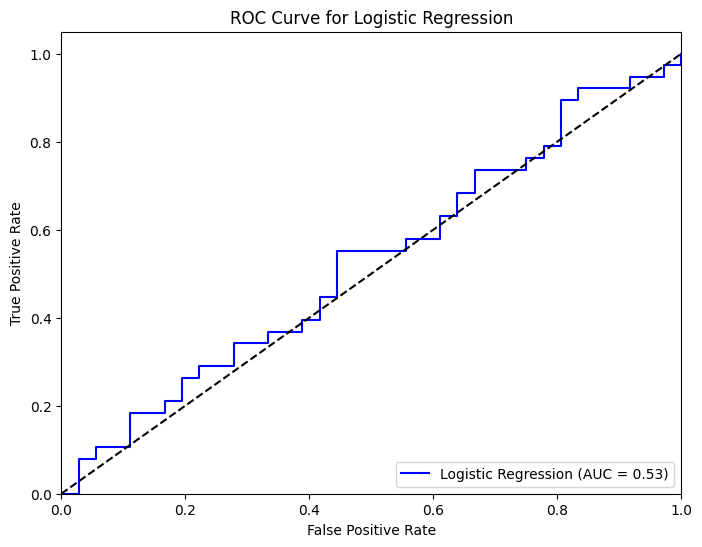

AUC-ROC for Logistic Regression: 0.53



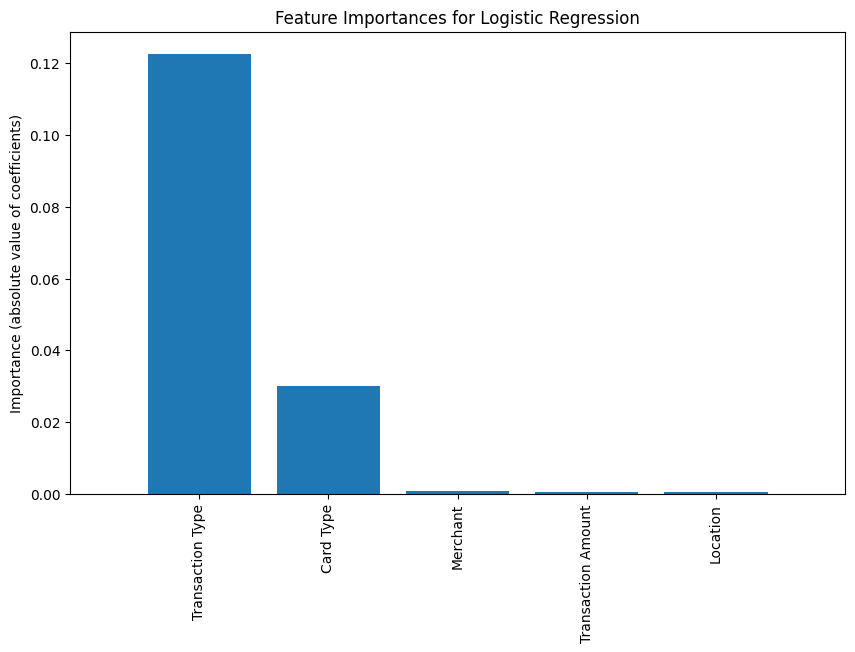

Evaluating Random Forest...


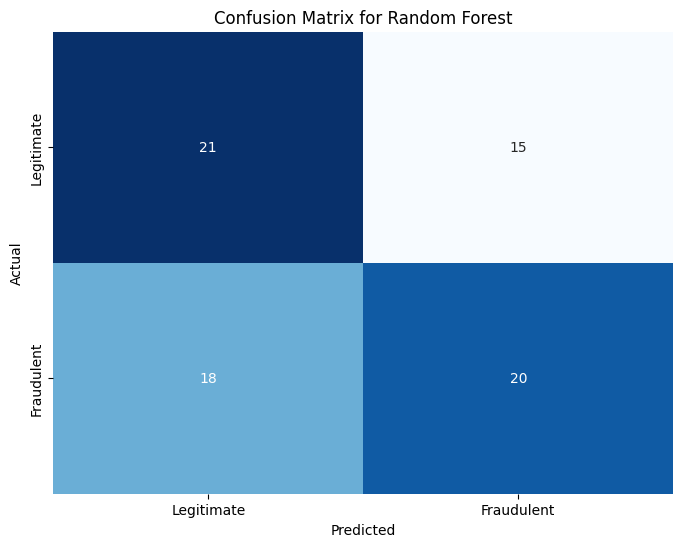

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56        36
           1       0.57      0.53      0.55        38

    accuracy                           0.55        74
   macro avg       0.55      0.55      0.55        74
weighted avg       0.56      0.55      0.55        74



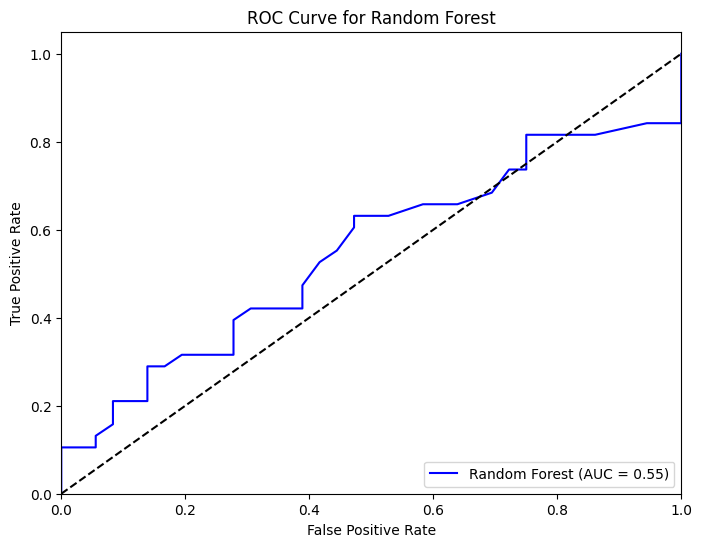

AUC-ROC for Random Forest: 0.55



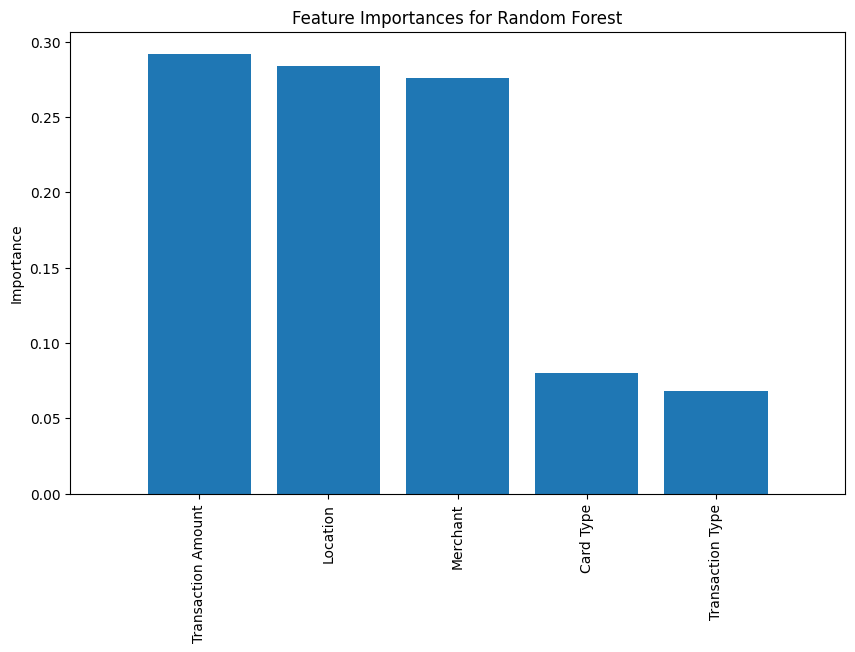

Evaluating Gradient Boosting...


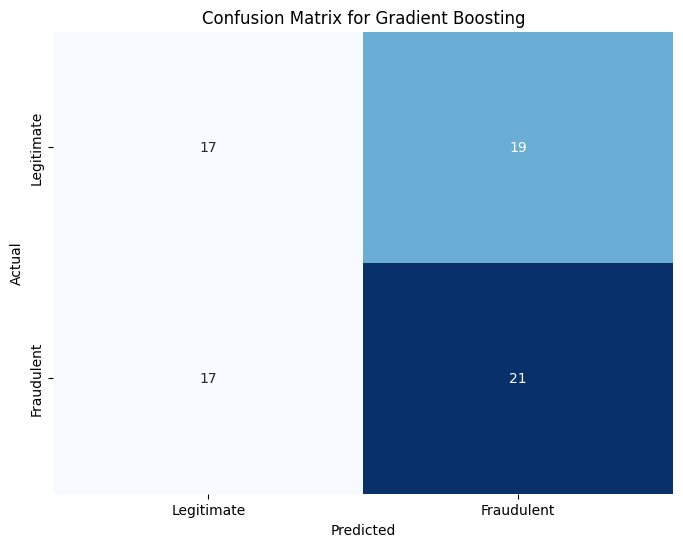

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.50      0.47      0.49        36
           1       0.53      0.55      0.54        38

    accuracy                           0.51        74
   macro avg       0.51      0.51      0.51        74
weighted avg       0.51      0.51      0.51        74



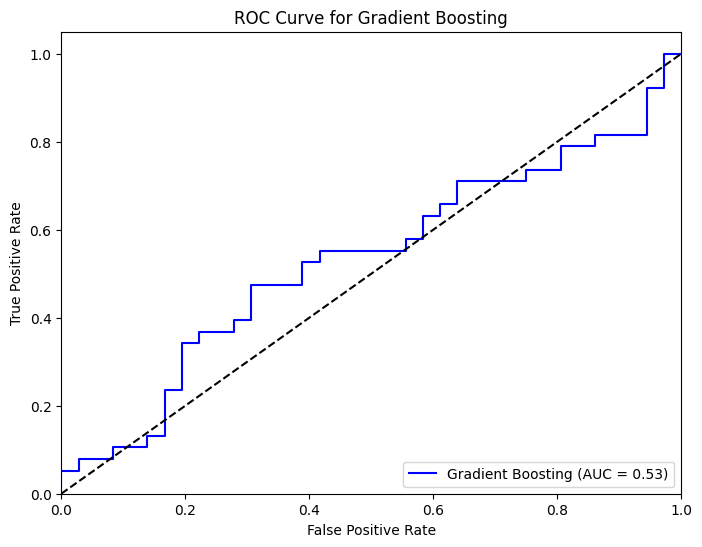

AUC-ROC for Gradient Boosting: 0.53



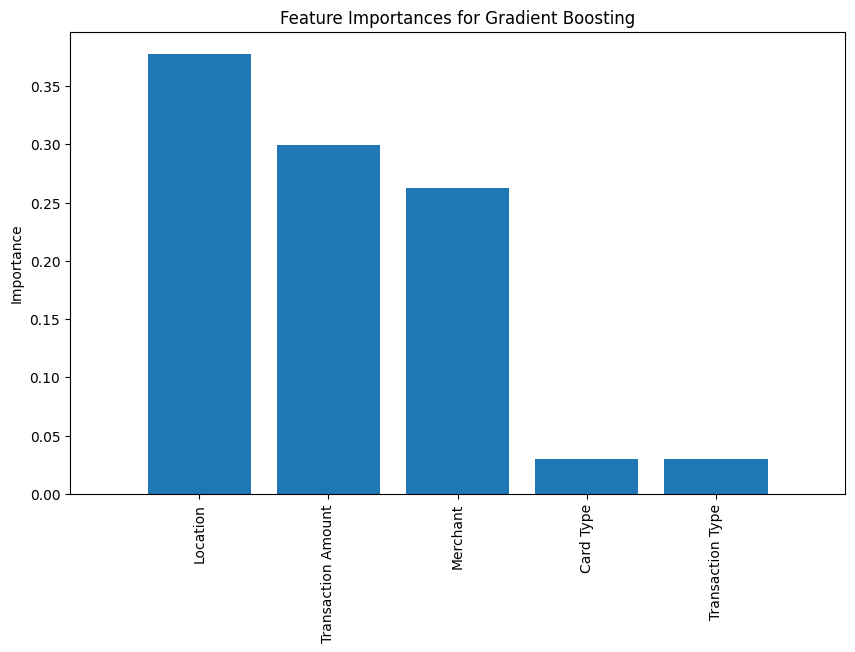

In [10]:
# Loop through the models and evaluate
for name, model in models.items():
    print(f"Evaluating {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

    # ROC Curve and AUC-ROC
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"AUC-ROC for {name}: {auc_score:.2f}\n")

    # Feature Importance for Logistic Regression
    if name == 'Logistic Regression':
        importance = np.abs(model.coef_[0])
        indices = np.argsort(importance)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title('Feature Importances for Logistic Regression')
        plt.bar(range(X.shape[1]), importance[indices], align='center')
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.ylabel('Importance (absolute value of coefficients)')
        plt.show()

    # Feature Importance for Random Forest and Gradient Boosting
    if name in ['Random Forest', 'Gradient Boosting']:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importances for {name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.ylabel('Importance')
        plt.show()